In [123]:
import pandas as pd
import numpy as np

import seaborn as sns
#grid search is used to find the optimal paramters for each model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
#Importing KNN, Logistic and Rf classifier from sklearn library
from sklearn.neighbors import KNeighborsClassifier
#Voting Classifier is used to make the prediction by majority vote
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [124]:
# Reading the csv dataset
df = pd.read_csv('C:/Users/AWU/Desktop/CSV Files/diabetes.csv')

In [125]:
# Returning first few observations
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [126]:
#dataset Size
df.shape

(768, 9)

In [127]:
#List of Column Names
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [128]:
#Data-types of each column
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [129]:
# Returning no. of missing values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [131]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [132]:
# Replacing 0 by NaN

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [133]:
# Re-checking no. of missing values in each column 

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [134]:
# From the above we found that there are 5 variables having misssing values (Glucose,BloodPressure,SkinThickness,Insulin,BMI)
# Filling NaN/Missing values 

df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [135]:
# Checking missing values correctly replaced

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [136]:
# Finding corelation among the dataset
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.230862,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281319,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230862,0.281319,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


In [137]:
# Getting unique values 

df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [138]:
# Finding counts of unique values and sorting it in ascending order

df['Pregnancies'].value_counts().sort_values()

17      1
15      1
14      2
12      9
13     10
11     11
10     24
9      28
8      38
7      45
6      50
5      57
4      68
3      75
2     103
0     111
1     135
Name: Pregnancies, dtype: int64

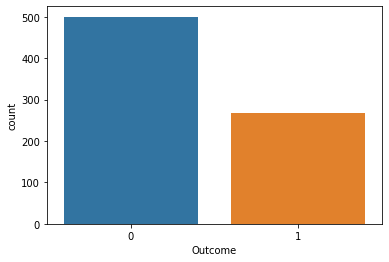

In [139]:
#Plotting a graph based on the Outcome Column
sns.countplot(x='Outcome', data=df)
plt.show()

In [140]:
#Count of Diabetes and Non-Diabetes patients 
diabetes_count = len(df.loc[df['Outcome'] == 1])
no_diabetes_count=len(df.loc[df['Outcome']==0])
(diabetes_count, no_diabetes_count)

(268, 500)

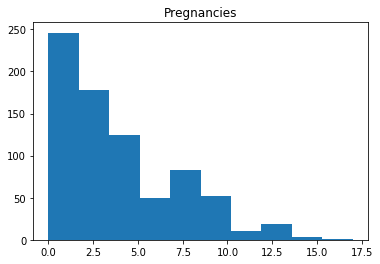

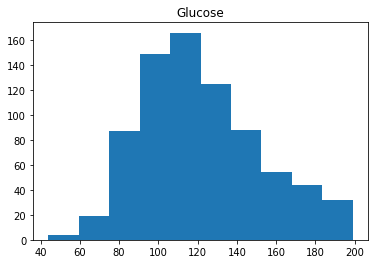

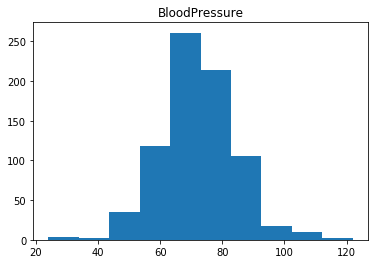

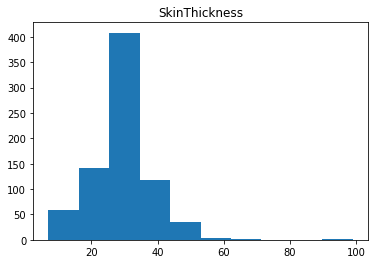

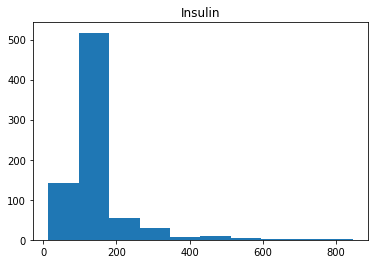

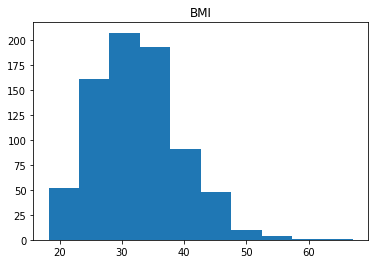

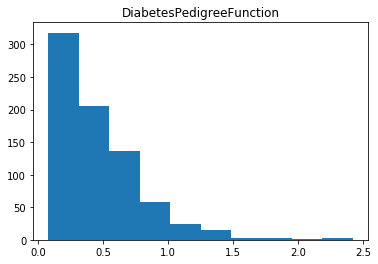

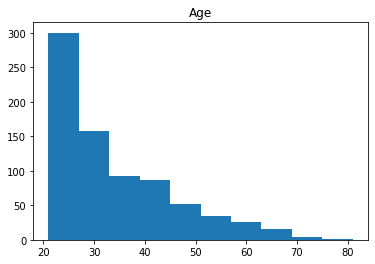

In [141]:
#Plotting graphs for all the parameters except the Outcome ie.,target parameter

cols=['Pregnancies','Glucose','BloodPressure','SkinThickness',
      'Insulin','BMI','DiabetesPedigreeFunction','Age']
num=df[cols]
for i in num.columns:
    plt.hist(num[i])
    plt.title(i)
    plt.show()

In [142]:
#here my target column is outcome hence i am splitting the dataset into two where in one the input(X) and the other target(Y)
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [143]:
#Training the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [144]:
#Performing KNN algorithm for the diabetes dataset
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#useing gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [145]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 11}


In [146]:
#Performing Random Forest Algorithm for the diabetes dataset 
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#useing gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [147]:
#save best model
rf_best = rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 50}


In [148]:
#Performing logistic regression Algorithm to the diabetes dataset
log_reg = LogisticRegression()

#fit the model to the training data
log_reg.fit(X_train, y_train)

C:\Users\AWU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
#Testing the accuracy for all the three models for the diabetes dataset
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

knn: 0.7575757575757576
rf: 0.7835497835497836
log_reg: 0.8008658008658008


In [150]:
#Performing Ensembly Modelling for the diabetes dataset

#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

C:\Users\AWU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7792207792207793

C:\Users\AWU\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


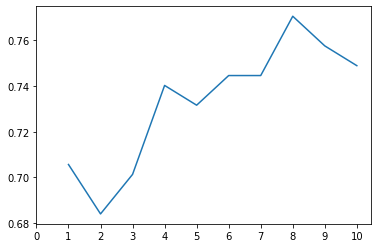

Accuracies for different values of n are: [0.70562771 0.68398268 0.7012987  0.74025974 0.73160173 0.74458874
 0.74458874 0.77056277 0.75757576 0.74891775]


In [151]:
#Question 1
#Display accuracies for different values of n in KNN Classifier 

a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

In [152]:
# Question 2
# Display number of rows with respect to the columns

print("Total number of rows : {0}".format(len(df)))
print("Number of rows with 0 Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("Number of rows with 0 Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("Number of rows with 0 BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("Number of rows with 0 SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("Number of rows with 0 Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("Number of rows with 0 BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("Number of rows with 0 DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("Number of rows with 0 Ages: {0}".format(len(df.loc[df['Age'] == 0])))


Total number of rows : 768
Number of rows with 0 Pregnancies: 111
Number of rows with 0 Glucose: 0
Number of rows with 0 BloodPressure: 0
Number of rows with 0 SkinThickness: 0
Number of rows with 0 Insulin: 0
Number of rows with 0 BMI: 0
Number of rows with 0 DiabetesPedigreeFunction: 0
Number of rows with 0 Ages: 0
